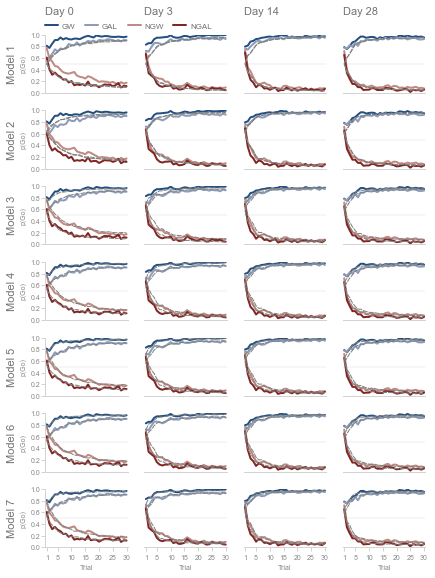

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import dirname
from pandas import read_csv, concat
sns.set_theme(style='ticks', context='notebook', font_scale=1.2, rc={'font.family': 'Arial'})
ROOT_DIR = dirname(dirname(dirname(os.path.realpath('__file__'))))
np.random.seed(47404)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define plot parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define I/O parameters.
models = ['pgng_m1', 'pgng_m2', 'pgng_m3', 'pgng_m4', 'pgng_m5', 'pgng_m6', 'pgng_m7']
sessions = ['s1','s2','s3','s4']

## Define variable ordering.
robots = ['gw','gal','ngw','ngal']

## Define palettes.
palette = ['#234f81', '#8e9cb8', '#bf8a82', '#812623']

## Define labels.
titles = ['Day 0', 'Day 3', 'Day 14', 'Day 28']

## Define axis styles.
labelcolor = '#737373'
tickcolor = '#8a8a8a'
axiscolor = '#d3d3d3'

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Initialize canvas.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig = plt.figure(figsize=(6,8))

## Initialize gridspec.
gs = fig.add_gridspec(7, 4, left=0.10, right=0.98, top=0.94, bottom=0.05, 
                      hspace=0.30, wspace=0.20)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

for i, model in enumerate(models):
    
    for j, session in enumerate(sessions):

        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Load and prepare data.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

        ## Load posterior predictive check.
        ppc = read_csv(os.path.join(ROOT_DIR, 'study01', 'stan_results', session, f'{model}_ppc.csv'))

        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Learning curves.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        
        ## Initialize axis.
        ax = fig.add_subplot(gs[i,j])
        
        ## Plot choices (observed).
        sns.lineplot(x='exposure', y='choice', hue='robot', data=ppc, hue_order=robots,
                     palette=palette, errorbar=None, legend=False, lw=2.0, ax=ax)
        
        ## Plot choices (predicted).
        sns.lineplot(x='exposure', y='Y_hat', hue='robot', data=ppc, hue_order=robots,
                     palette=['0.5']*4, errorbar=None, legend=False, lw=1.0, linestyle=(0, (5,1)), ax=ax)
        
        ## Add midway line.
        ax.axhline(0.5, color='k', alpha=0.05, zorder=-1)

        ## Adjust x-axis.
        ax.set(xlim=(0.5,30.5), xticks=np.append(1, np.arange(5,31,5)), xticklabels=[], xlabel='')
        if i == len(models)-1:
            ax.set_xticklabels(ax.get_xticks(), color=tickcolor, fontsize=7)
            ax.set_xlabel('Trial', color=tickcolor, fontsize=7)

        ## Adjust y-axis.
        ax.set(ylim=(0,1), yticks=[], yticklabels=[], ylabel='')
        if not j: 
            ax.set_yticks(np.linspace(0,1,6))
            ax.set_yticklabels(ax.get_yticks().round(1), color=tickcolor, fontsize=7)
            ax.set_ylabel('p(Go)', color=tickcolor, fontsize=7)
        
        ## Adjust title.
        if not i:
            ax.set_title(titles[j], loc='left', color=labelcolor, fontsize=11, pad=20)
        
        ## Adjust legend.
        if not i and not j:
            for color, label in zip(palette, robots): ax.plot([], [], color=color, label=label.upper(), lw=2)
            ax.legend(loc=2, bbox_to_anchor=(0, 1.21), ncol=4, frameon=False, labelcolor=labelcolor, fontsize=8,
                      borderpad=0, borderaxespad=0, handletextpad=0.5, handlelength=1.6, columnspacing=1.2)
        
        ## Add annotation.
        if not j:
            ax.annotate(f'Model {i+1}', (0,0), (-0.34, 0.5), 'axes fraction', ha='right', va='center',
                        color=labelcolor, fontsize=11, rotation=90)
        
        ## Modify ax spines.
        ax.yaxis.set_tick_params(pad=1)
        for side in ['left','bottom']: ax.spines[side].set(linewidth=1, color=axiscolor)
        ax.tick_params(bottom=i==len(models)-1, left=True, color=axiscolor, length=4, width=1)
        if not j: sns.despine(ax=ax, left=False, right=True, top=True, bottom=False)
        else: sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)
        
## Save figure.
plt.savefig(os.path.join(ROOT_DIR, 'figures', 'figS02.png'), dpi=200)